In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = "d:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [2]:
Lkvec_unique = Lkvec.drop_duplicates(subset=['phrase'])
Lkvec_unique

,time,frequency,media,phrase,root,id
0,2008-08-18 18:31:45,3,B,kind of creepy,it's kind of creepy to think that that many pe...,1785689
11,2008-09-25 22:03:51,1,M,it's kind of creepy,it's kind of creepy to think that that many pe...,1785689
78,2008-11-10 18:50:24,1,B,it's kind of creepy to think that that many pe...,it's kind of creepy to think that that many pe...,1785689
90,2008-09-24 04:43:54,1,M,we support all research that would further the...,we support all research that would further the...,1117502
161,2008-09-24 17:14:33,1,M,we support all research that would further the...,we support all research that would further the...,1117502
...,...,...,...,...,...,...
7665043,2008-12-15 21:51:32,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921
7665076,2008-12-15 23:37:35,1,M,the current cholera epidemic is only the most ...,the current cholera epidemic is only the most ...,2222921
7665095,2008-09-05 17:08:04,1,B,and then click,option and then click on the,1686328
7665100,2008-11-02 21:35:41,2,B,and then click on the,option and then click on the,1686328


In [3]:
Lkvec_phrs_count = list(Lkvec_unique['id'].value_counts())
Lkvec_unique.value_counts('id')

id
2595895    177
1509852    132
1428671    101
1189        97
2323766     89
          ... 
1128644      3
1128691      3
1128694      3
1128758      3
2717518      3
Name: count, Length: 71568, dtype: int64

In [11]:
import pickle as pk
import os
import re

def extract_variables(patern, path, ext):
    variables = {}

    for file in os.listdir(path):
        if file.endswith(ext):
            number = re.findall(patern, file)[0]
            variable_name = f"cluster_{number}"
            value = pk.load(open(path+file, 'rb'))
            variables[variable_name] = value
            print(file)
    
    return variables

def cant(variables):
    archivos = list(variables.keys())
    cantidades = {}
    for file in archivos:
        data = variables.get(file)
        cantidad = []
        for i, cluster in enumerate(data):
            cantidad.append(len(data[i]))

        cantidades[file] = cantidad
    return cantidades, archivos

patern = r"_(\d+).pickle"
pathGit = 'd:/Git_Proyects/Tesis/Embbedings_Lkvec/'

In [18]:
var1 = extract_variables(patern, pathGit, '.pickle')
cant1, f1 = cant(var1)

patern2 =  r"_(\d+)_2.pk"
var2 = extract_variables(patern2, pathGit, '.pk')
cant2, f2 = cant(var2)

clusters_threshold_5.pickle
clusters_threshold_6.pickle
clusters_threshold_75.pickle
clusters_threshold_8.pickle
clusters_threshold_6_2.pk
clusters_threshold_75_2.pk
clusters_threshold_8_2.pk


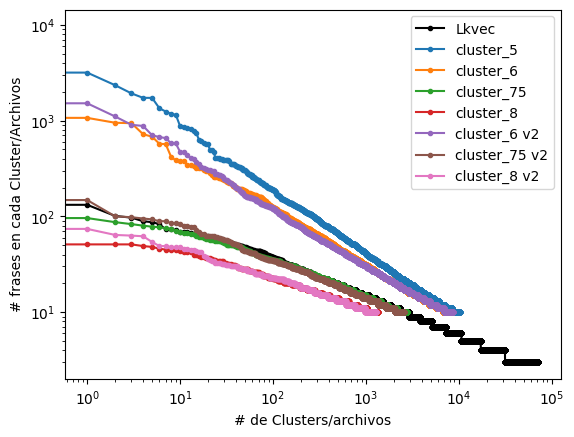

In [20]:
sorted(Lkvec_phrs_count, reverse = True)

plt.figure()
plt.plot(sorted(Lkvec_phrs_count, reverse = True), '.-',label ='Lkvec', color = 'black')
for file in f1:
    cant_plot = sorted(cant1[file], reverse = True)
    plt.plot(cant_plot, '.-', label = file)

for file in f2:
    cant_plot = sorted(cant2[file], reverse = True)
    plt.plot(cant_plot, '.-', label = file+' v2')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('# frases en cada Cluster/Archivos')
plt.xlabel('# de Clusters/archivos')
plt.legend()
plt.show()

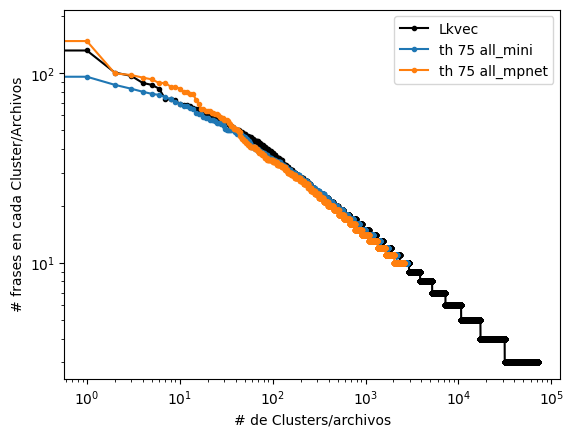

In [36]:
sorted(Lkvec_phrs_count, reverse = True)

plt.figure()
plt.plot(sorted(Lkvec_phrs_count, reverse = True), '.-',label ='Lkvec', color = 'black')
plt.plot(sorted(cant1['cluster_75'], reverse=True), '.-', label ='th 75 all_mini')
plt.plot(sorted(cant2['cluster_75'], reverse=True), '.-', label ='th 75 all_mpnet')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('# frases en cada Cluster/Archivos')
plt.xlabel('# de Clusters/archivos')
#plt.xlim([1000, 10000])
plt.legend()
plt.show()


In [ ]:
cant1['cluster_75']

In [9]:
archivos = list(variables.keys())
cantidades = {}
for file in archivos:
    data = variables.get(file)
    cantidad = []
    for i, cluster in enumerate(data):
        cantidad.append(len(data[i]))

    cantidades[file] = cantidad
    

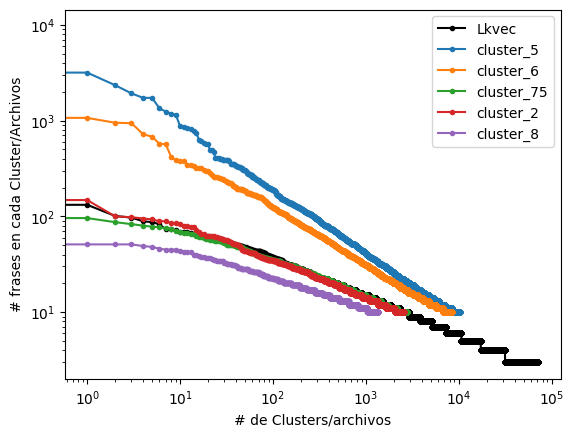

In [11]:
sorted(Lkvec_phrs_count, reverse = True)

plt.figure()
plt.plot(sorted(Lkvec_phrs_count, reverse = True), '.-',label ='Lkvec', color = 'black')
for file in archivos:
    cant_plot = sorted(cantidades[file], reverse = True)
    plt.plot(cant_plot, '.-', label = file)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('# frases en cada Cluster/Archivos')
plt.xlabel('# de Clusters/archivos')
plt.legend()
plt.show()

In [60]:
list(Lkvec_unique[Lkvec_unique['id'] == 1428671]['phrase'])
#test = list(Lkvec_unique['id'].value_counts())

['barack hussein obama',
 'protect and defend',
 'the best of',
 'the united states',
 'preserve protect and defend the constitution of the united states',
 'the president of the united states',
 'i do solemnly swear that i will faithfully execute the office of president of the united states and will to the best of my ability preserve protect and defend the constitution of the united states',
 'constitution of the united states',
 'president of the united states',
 'to the best of my knowledge',
 'i do solemnly swear or affirm that i will faithfully execute the office of president of the united states and will to the best of my ability preserve protect and defend the constitution of the united states',
 'to the utmost of his ability',
 'defend the constitution of the united states',
 'preserve protect and defend the constitution',
 'i will to the best of my ability preserve protect and defend the constitution of the united states',
 'defend the constitution',
 'preserve protect and def

In [41]:
import pickle as pk
path1 = 'd:/Git_Proyects/Tesis/'
clusters = pk.load(open(path1+'Embbedings_Lkvec/clusters_threshold_75_2.pk', 'rb'))
#clusters = pk.load(open(path1+'Embbedings_Lkvec/clusters_threshold_75.pickle', 'rb'))
phr = pk.load(open(path+'phr_embbedings/phrases_to_emb.pickle', 'rb'))
len(clusters[0])

173

In [81]:
for phrases_numbers in clusters[32]:
    print(phr[phrases_numbers]) 

longa e dif cil
un momento muy dif cil
ano muito dif cil
dif cil acceso
ano dif cil
a o dif cil
um jogo dif cil
per odo dif cil
momento dif cil
era dif cil
fue una decisi n muy dif cil
era muy dif cil
muito dif cil prever
es un a o dif cil
un momento dif cil
es muy dif cil
lo veo m s dif cil
algo dif cil
mais f cil
en un momento muy dif cil
la dif cil situaci n
mucho m s dif cil
ser dif cil
en una situaci n dif cil
o dinheiro f cil
periodo dif cil
un a o dif cil
muito mais dif cil
particularmente dif cil
realmente dif cil
un a o muy dif cil
est dif cil pero no imposible
ser dif cil pero no imposible
dura y dif cil
ser muy dif cil
um ano muito dif cil
dif cil decir
dif cil de entender
en la situaci n dif cil
una situaci n dif cil
ser a dif cil
isso dif cil
es f cil
a veces es muy dif cil
va a ser dif cil
es dif cil
siempre dif cil
ser muito dif cil
vai ser um ano muito dif cil
es una situaci n dif cil
algo muy dif cil
ser un a o dif cil
parto dif cil
dif cil de manejar
dif cil para todo